# 25.4.3 MH Algorithm

Potentially useful for regression question?

In [1]:
set.seed(0) # for replicability
t.A <- 10 # true slope
t.B <- 0 # true intercept
t.sd <- 20 # true noise
s.Size <- 50 # sample size

In [2]:
x <- (-(s.Size-1)/2):((s.Size-1)/2) # equally-spaced X values

In [3]:
y <- t.A * x + t.B + rnorm(n=s.Size,mean=0,sd=t.sd) # corresponding 𝑦 values are such that 𝑦 ∼ N(𝑎𝑥 + 𝑏, 𝜎^2)

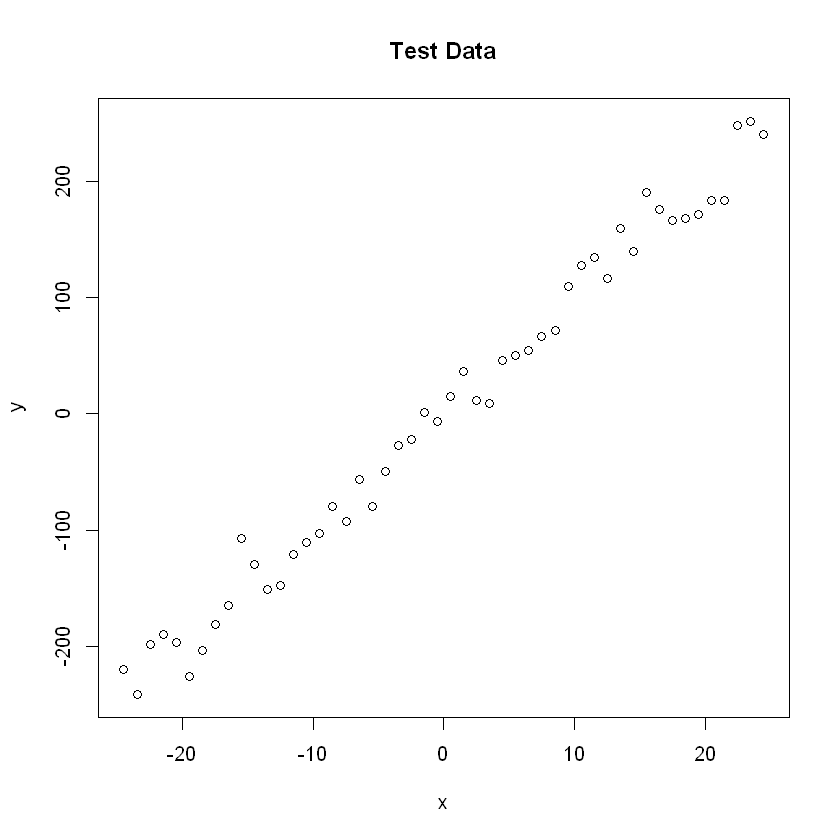

In [4]:
plot(x,y, main="Test Data")

In [5]:
likehd <- function(param){
a = param[1]
b = param[2]
sd = param[3]
pred = a*x + b
singlelikelihoods = dnorm(y, mean=pred, sd=sd, log=T)
sumll = sum(singlelikelihoods)
return(sumll)
}


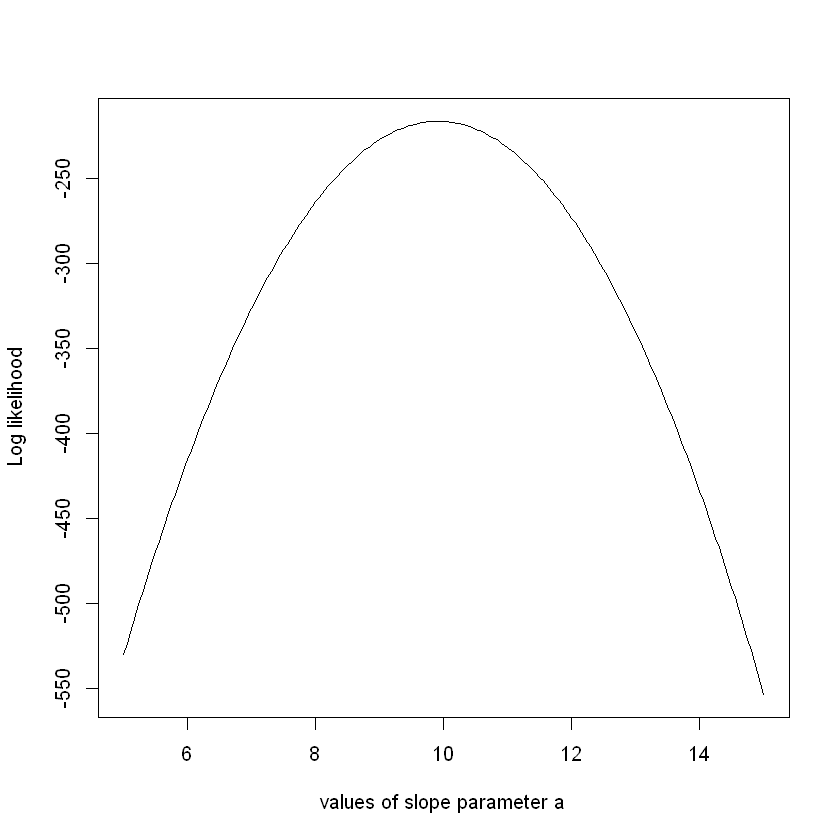

In [6]:
s.values <- function(x){return(likehd(c(x, t.B, t.sd)))}
s.likehds <- lapply(seq(1/2*t.A, 3/2*t.A, by=.05), s.values )
plot (seq(1/2*t.A, 3/2*t.A, by=.05), s.likehds , type="l",
xlab = "values of slope parameter a", ylab = "Log likelihood")

In [7]:
prior <- function(param){
a = param[1]
b = param[2]
sd = param[3]
aprior = dunif(a, min=0, max=2*t.A, log = T)
bprior = dnorm(b, mean=t.B, sd = 5, log = T)
sdprior = dunif(sd, min=0, max=2*t.sd, log = T)
return(aprior+bprior+sdprior)
}

In [8]:
posterior <- function(param){
return (likehd(param) + prior(param))
}


In [9]:
proposalfunction <- function(param){
return(rnorm(3,mean = param, sd= c(0.1,0.5,0.3)))
}
run_metropolis_MCMC <- function(startvalue, iterations){
chain = array(dim = c(iterations+1,3))
chain[1,] = startvalue
for (i in 1:iterations){
proposal = proposalfunction(chain[i,])
probab = exp(posterior(proposal) - posterior(chain[i,]))
if (runif(1) < probab){
chain[i+1,] = proposal
}
else{
chain[i+1,] = chain[i,]
}
}
return(chain)
}
startvalue = c(4,1,10) # random choice
chain = run_metropolis_MCMC(startvalue, 10000)

In [10]:
burnIn = 5000
acceptance = 1-mean(duplicated(chain[-(1:burnIn),]))

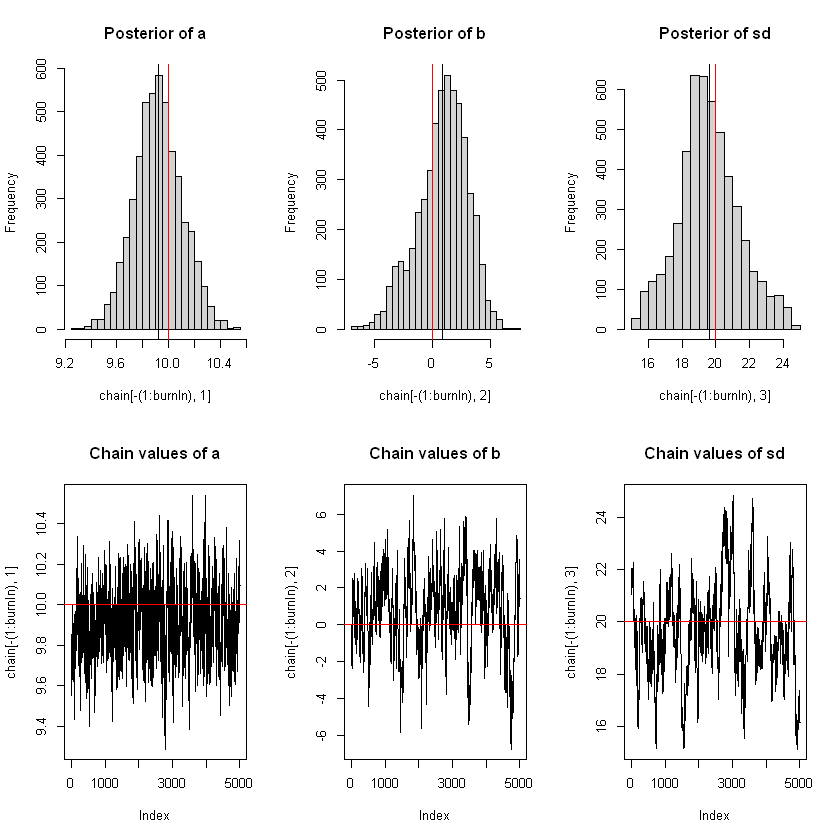

In [11]:
par(mfrow = c(2,3))
hist(chain[-(1:burnIn),1],nclass=30, main="Posterior of a")
abline(v = mean(chain[-(1:burnIn),1]))
abline(v = t.A, col="red" )
hist(chain[-(1:burnIn),2],nclass=30, main="Posterior of b")
abline(v = mean(chain[-(1:burnIn),2]))
abline(v = t.B, col="red" )
hist(chain[-(1:burnIn),3],nclass=30, main="Posterior of sd")
abline(v = mean(chain[-(1:burnIn),3]) )
abline(v = t.sd, col="red" )
plot(chain[-(1:burnIn),1], type = "l", main = "Chain values of a")
abline(h = t.A, col="red" )
plot(chain[-(1:burnIn),2], type = "l", main = "Chain values of b")
abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),3], type = "l", main = "Chain values of sd")
abline(h = t.sd, col="red" )

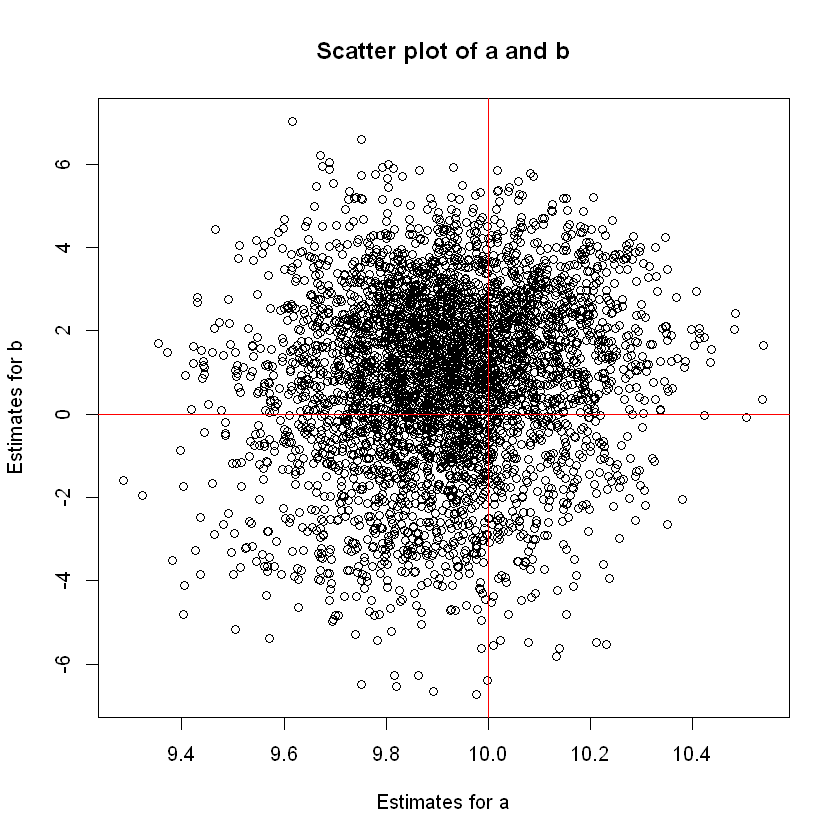

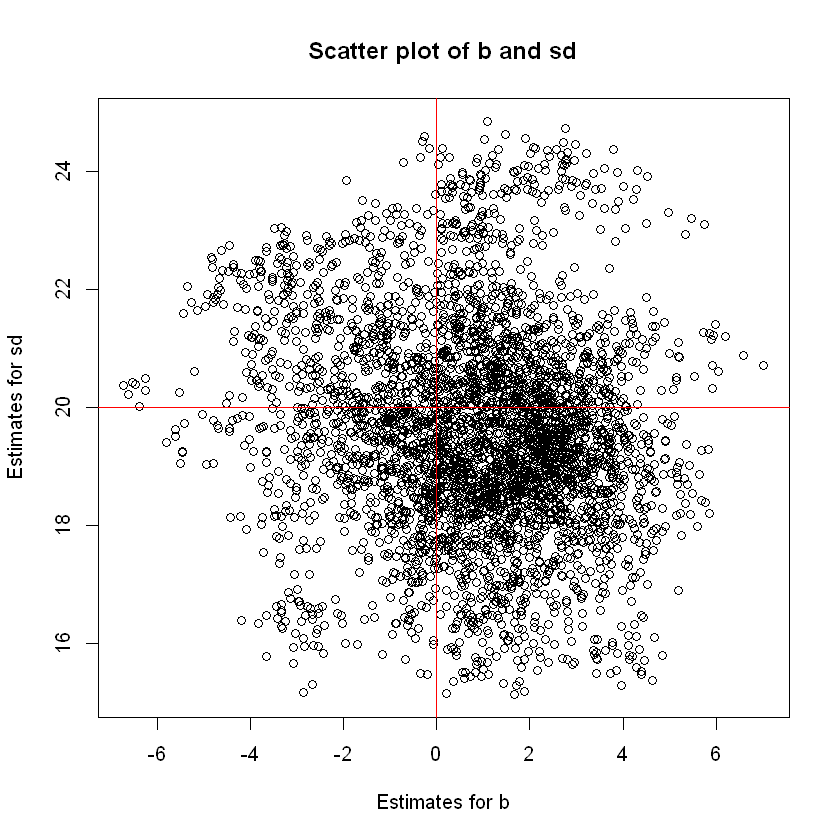

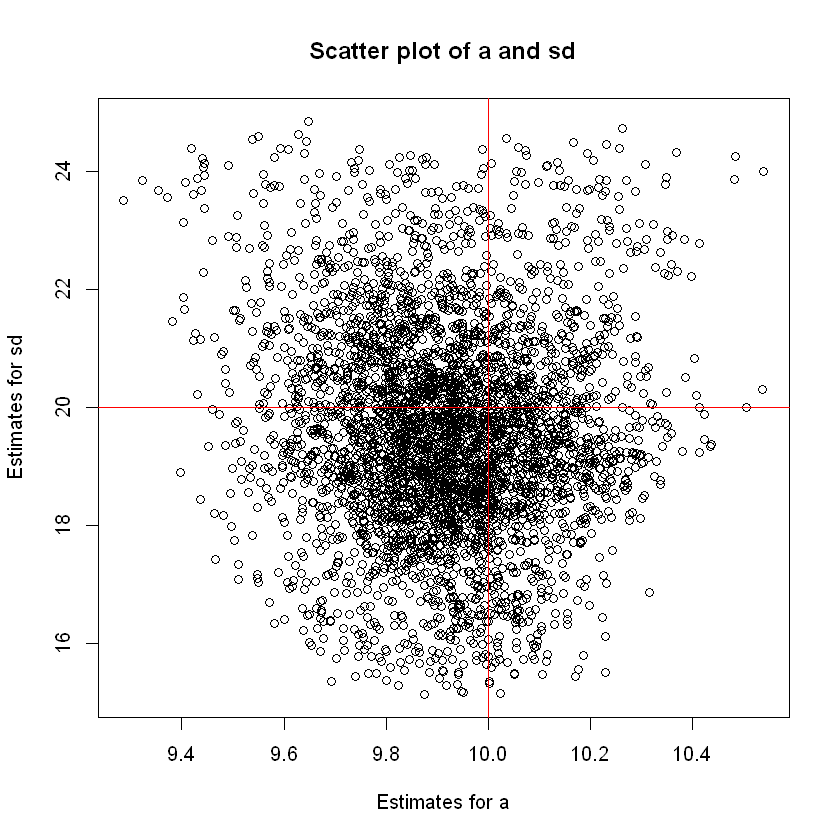

In [12]:
plot(chain[-(1:burnIn),1:2], main="Scatter plot of a and b",
xlab="Estimates for a", ylab="Estimates for b")
abline(v = t.A, col="red" )
abline(h = t.B, col="red" )
plot(chain[-(1:burnIn),2:3], main="Scatter plot of b and sd",
xlab="Estimates for b", ylab="Estimates for sd")
abline(v = t.B, col="red" )
abline(h = t.sd, col="red" )
plot(chain[-(1:burnIn),c(1,3)], main="Scatter plot of a and sd",
xlab="Estimates for a", ylab="Estimates for sd")
abline(v = t.A, col="red" )
abline(h = t.sd, col="red" )

In [13]:
summary(lm(y~x))


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-33.067 -12.201  -3.733  14.562  46.192 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.4786     2.6115   0.183    0.855    
x             9.9082     0.1810  54.751   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 18.47 on 48 degrees of freedom
Multiple R-squared:  0.9842,	Adjusted R-squared:  0.9839 
F-statistic:  2998 on 1 and 48 DF,  p-value: < 2.2e-16
